# Understanding Descriptive Statistics

Import the necessary libraries here:

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

def throws(x):
    return random.choices(dice, k = x)


dice = [1, 2 ,3 ,4, 5, 6]
#roll=random.choices(dice, k = 10)

rolls=throws(10)

df = pd.DataFrame(rolls, columns=['value'], 
    index=['Roll 1', 'Roll 2', 'Roll 3', 'Roll 4', 'Roll 5', 'Roll 6', 'Roll 7', 'Roll 8', 'Roll 9', 'Roll 10'])
df

,value
Roll 1,2
Roll 2,4
Roll 3,4
Roll 4,6
Roll 5,2
Roll 6,5
Roll 7,4
Roll 8,5
Roll 9,3
Roll 10,4


#### 2.- Plot the results sorted by value.

<AxesSubplot:title={'center':'Dice value for each throw'}>

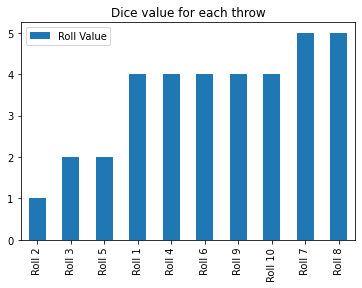

In [3]:
df_sort=df.sort_values(by='value').plot(kind='bar')
plt.title('Dice value for each throw')
df_sort

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<AxesSubplot:xlabel='Roll Value'>

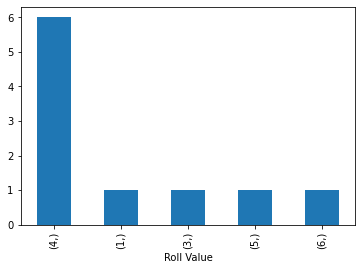

In [25]:
df_count=df.sort_values(by='value').value_counts().plot(kind='bar')
df_count

In [5]:
"""
The bars are sorted from highest to lowest
"""

'\nThe bars are sorted from highest to lowest\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
def roll_mean(roll_lst):
    sum = 0
    for i in roll_lst:
        sum = sum + i
   
    return sum/len(roll_lst)
    #return df['Roll Value'].sum()/len(df['Roll Value'])
    #alternative solution from class
roll_mean(rolls)

3.5

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [87]:
def roll_distr(df):
    return df.value_counts()
roll_distr(df['value'])
roll_distr(df).sum()/len(roll_distr(df))
#mean of roll_distr(df) output, not from total rolls (which is len=10, not 6)

KeyError: 'value'

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [19]:
def median_calc(df):
    if len(df['value'])%2==0:
        return (df['value'][len(df)//2]+df['value'][(len(df)//2)+1])/2
    else:
        x=df['value'][(len(df)//2)-1]
median_calc(df)

2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [ ]:
# your code here

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

<AxesSubplot:>

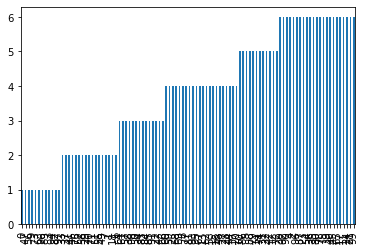

In [30]:
df=pd.read_csv(r"C:\Users\Mario\Documents\Labs\Module2\Lab_4_Descriptive-Statistics\roll_the_dice_hundred.csv")
df['value'].sort_values().plot(kind='bar')

In [31]:
"""
arround 50% of the rolls are 4 and 6. There is a high probability for rolls of 4 or higher
"""

'\narround 50% of the rolls are 4 and 6. There is a high probality for rolls of 4 or higher\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [54]:
roll_mean(df['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [55]:
roll_distr(df['value'])

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

Text(4.114000000000001, 21.735, 'Mean: 3.74')

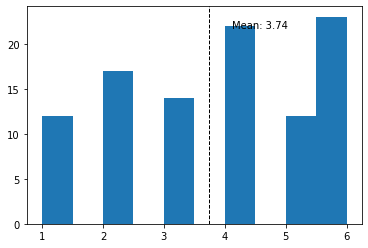

In [57]:
x=df['value']
plt.hist(x)
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [58]:
df=pd.read_csv(r"C:\Users\Mario\Documents\Labs\Module2\Lab_4_Descriptive-Statistics\roll_the_dice_thousand.csv")
roll_distr(df['value'])

1    175
3    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64

In [ ]:
"""
yes,  the rolls are more evenly spread now and not anymore to the higher end
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

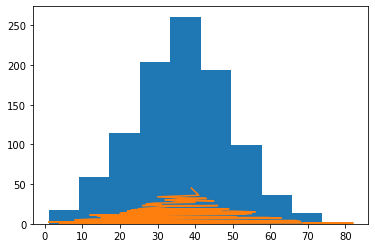

In [145]:
df=pd.read_csv(r"C:\Users\Mario\Documents\Labs\Module2\Lab_4_Descriptive-Statistics\ages_population.csv")
#plt.hist(df['observation'])
#mean will be arround 35 and the standard deviation should be around 15
plt.plot(roll_distr(df['observation']))

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [131]:
df['observation'].mean()
df['observation'].std()


27.155

In [ ]:
"""
yes values are coles to the guessed one
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

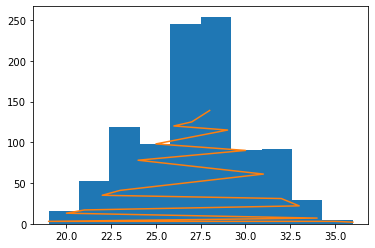

In [140]:
df=pd.read_csv(r"C:\Users\Mario\Documents\Labs\Module2\Lab_4_Descriptive-Statistics\ages_population2.csv")
#plt.hist(df['observation'])
plt.plot(roll_distr(df['observation']))


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
yes, there are mostly only between people between 20 and 35 years
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [130]:
df['observation'].mean()
df['observation'].std()

2.969813932689186

In [ ]:
"""
the mean is nearlz the same but the standard deviation is a lot lower because the age range in general is smaller then before
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

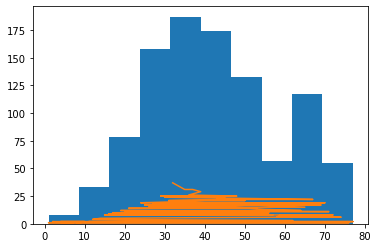

In [142]:
df=pd.read_csv(r"C:\Users\Mario\Documents\Labs\Module2\Lab_4_Descriptive-Statistics\ages_population3.csv")
#plt.hist(df['observation'])
plt.plot(roll_distr(df['observation']))

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [144]:
df['observation'].mean()
df['observation'].std()

41.989

In [ ]:
"""
the average age is getting higher and also the standard variation, because age is more distributed this time
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
quart_

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""